<a href="https://colab.research.google.com/github/zago2006/data_science/blob/main/regressagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import scipy.stats as stats
import seaborn as sns

In [ ]:
base = pd.read_csv('mt_cars.csv')
base.shape

(32, 12)

In [ ]:
base.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
base = base.drop(['Unnamed: 0'], axis=1)

<Axes: >

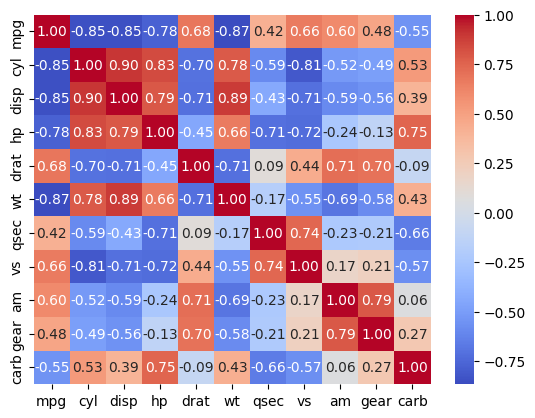

In [ ]:
corr = base.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')

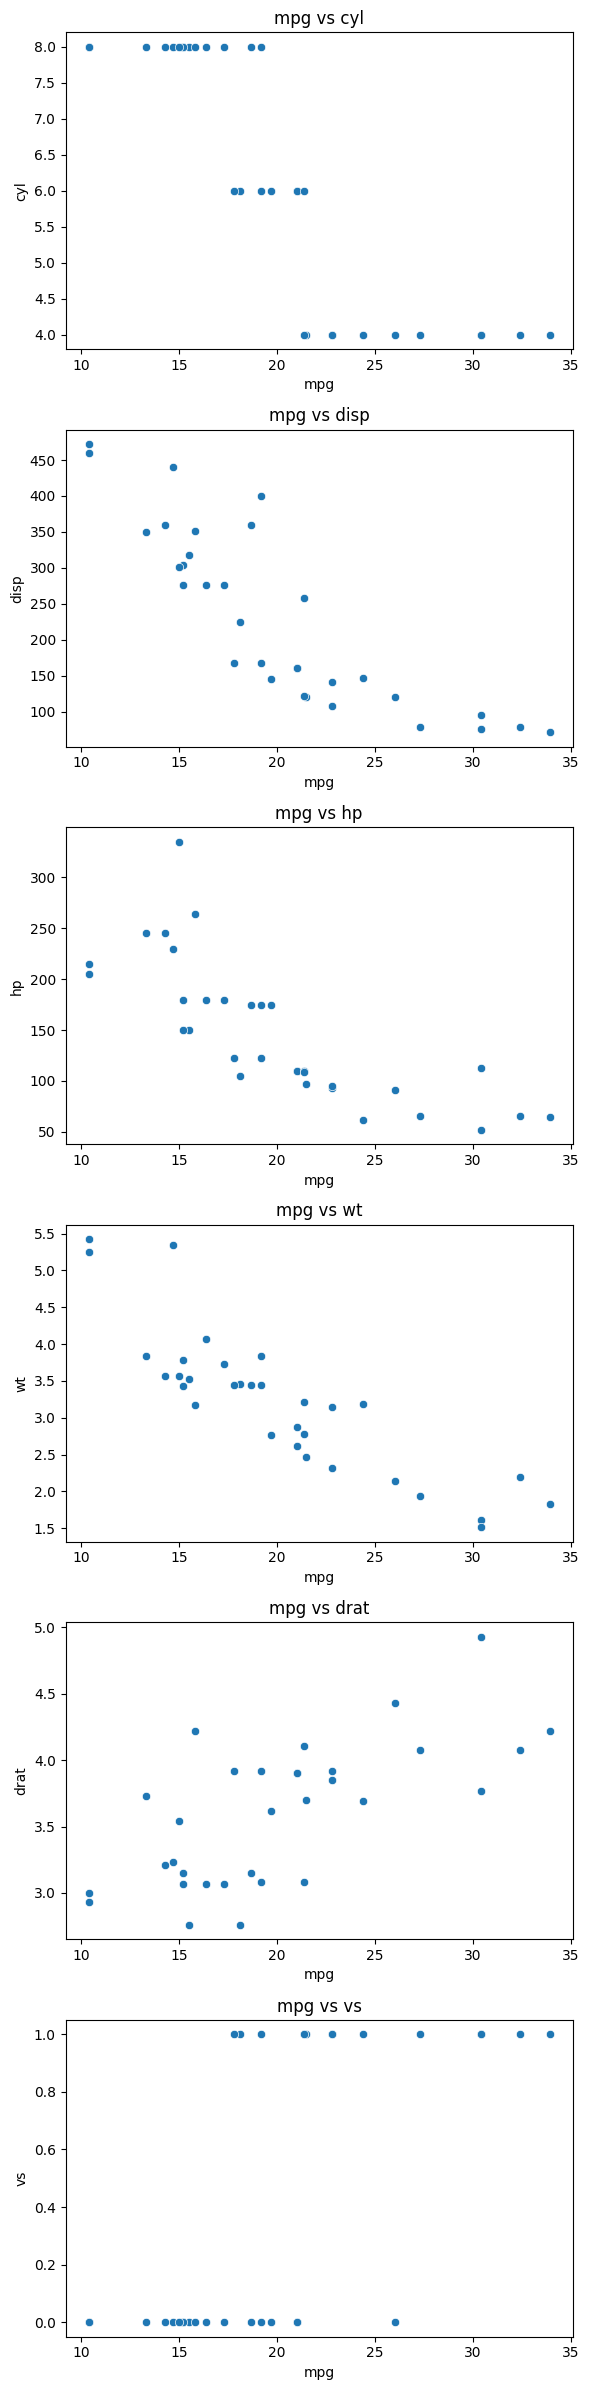

In [ ]:
column_pairs = [('mpg','cyl'),('mpg','disp'),('mpg','hp'),('mpg','wt'),('mpg','drat'),('mpg','vs')]
n_plots = len(column_pairs)
fig, axes = plt.subplots(nrows=n_plots, ncols=1, figsize=(6,4 * n_plots))

for i, pair in enumerate(column_pairs):
  x_col, y_col = pair
  sns.scatterplot(x=x_col, y=y_col, data=base, ax=axes[i])
  axes[i].set_title(f'{x_col} vs {y_col}')

plt.tight_layout()
plt.show()

In [ ]:
modelo = sm.ols(formula='mpg ~ wt + disp + hp', data=base)
modelo = modelo.fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     44.57
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           8.65e-11
Time:                        01:10:39   Log-Likelihood:                -74.321
No. Observations:                  32   AIC:                             156.6
Df Residuals:                      28   BIC:                             162.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.1055      2.111     17.579      0.000      32.782      41.429
wt            -3.8009      1.066     -3.565      0.001      -5.985      -1.617
disp          -0.0009      0.010     -0.091      0.929      -0.022       0.020
hp            -0.0312      0.011     -2.724      0.011      -0.055      -0.008
==============================================================================
Omnibus:                        5.269   Durbin-Watson:                   1.367
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                4.038
Skew:                           0.856   Prob(JB):                        0.133
Kurtosis:                       3.310   Cond. No.                     1.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

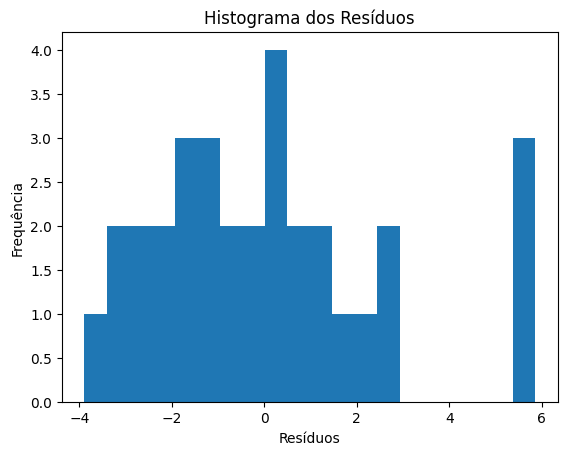

In [ ]:
residuos = modelo.resid
plt.hist(residuos, bins=20)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos')
plt.show()

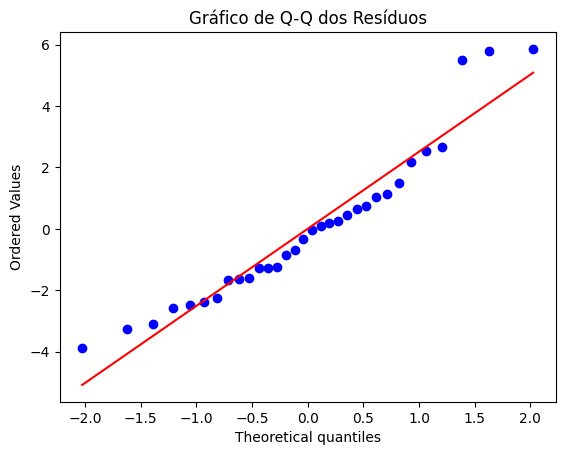

In [ ]:
stats.probplot(residuos, dist='norm', plot=plt)
plt.title('Gráfico de Q-Q dos Resíduos')
plt.show()

In [ ]:
stat, pval = stats.shapiro(residuos)
print(f'Estatística do Teste de Shapiro-Wilk: {stat: .3f}, p-value: {pval: .3f}')

Estatística do Teste de Shapiro-Wilk:  0.927, p-value:  0.033
